In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textblob import TextBlob
import numpy as np

#### Loading the Data

In [192]:
path = '/Users/jennishachristinamartin/Downloads/merged_training.pkl'
# loading the data
d = pd.read_pickle(path)
print(d.head())

                                                     text emotions
27383   i feel awful about it too because it s my job ...  sadness
110083                              im alone i feel awful  sadness
140764  ive probably mentioned this before but i reall...      joy
100071           i was feeling a little low few days back  sadness
2837    i beleive that i am much more sensitive to oth...     love


#### Exploring the Data

In [194]:
print(f"Number of rows: {len(d)}")
print(f"Number of variables: {len(d.columns)}\n")
print(d.info())

Number of rows: 416809
Number of variables: 2

<class 'pandas.core.frame.DataFrame'>
Index: 416809 entries, 27383 to 64703
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      416809 non-null  object
 1   emotions  416809 non-null  object
dtypes: object(2)
memory usage: 9.5+ MB
None


#### Summarizing Data

In [196]:
# Getting the summary
print("\n Statistics:")
print(d.describe())


 Statistics:
                                                 text emotions
count                                          416809   416809
unique                                         393822        6
top     i feel more adventurous willing to take risks      joy
freq                                               16   141067


#### Checking for Missing Values

In [198]:
print(d.isnull().sum())

text        0
emotions    0
dtype: int64


In [199]:
# checking for NaN missing values
nan_values = d.isna().sum()

# printing the number of NaN values for each column
print("\nNumber of NaN values in each column:")
print(nan_values)


Number of NaN values in each column:
text        0
emotions    0
dtype: int64


In [200]:
print(d.columns)

Index(['text', 'emotions'], dtype='object')


#### Identifying the Numeric Variables and Categorical Variables

In [202]:
# getting the numerical variables
numerical_vars = d.select_dtypes(include=['number']).columns.tolist()
# getting the categorical variables
categorical_vars = d.select_dtypes(include=['object', 'category']).columns.tolist()
# displaying the numerical variables
print("Numerical variables:", numerical_vars)
# displaying the categorical variables
print("Categorical variables:", categorical_vars)

Numerical variables: []
Categorical variables: ['text', 'emotions']


#### Exploring the Label Distribution

In [204]:
label_dis = d['emotions'].value_counts()
print(label_dis)

emotions
joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: count, dtype: int64


####  Distribution of Each Emotion

/var/folders/8m/b138532d02d3s5z26hxk39j40000gn/T/ipykernel_22866/356736985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="coolwarm")


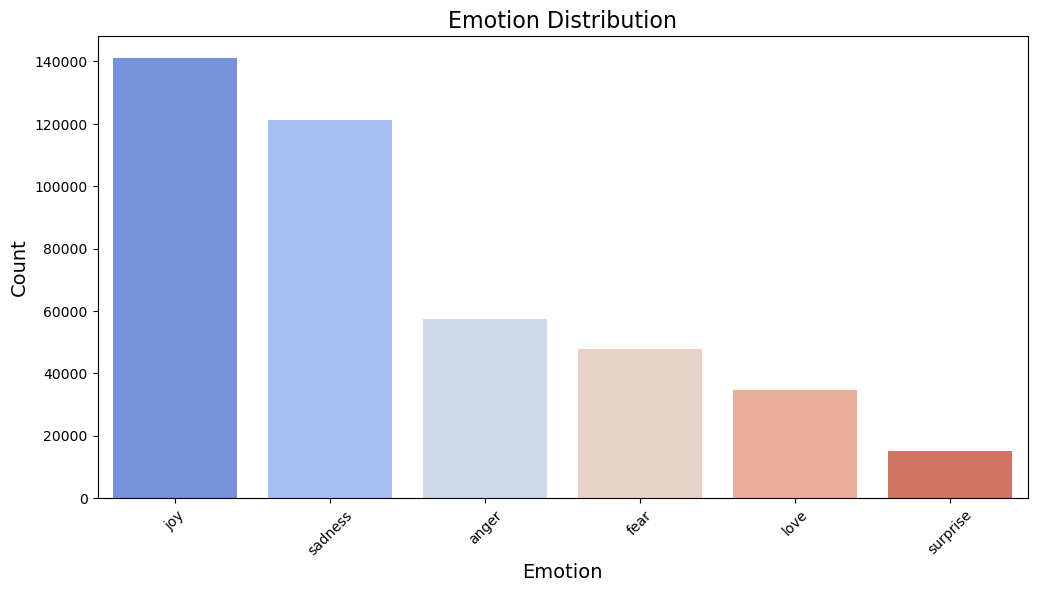

In [206]:
# plotting the distribution of each emotion in the data set
plt.figure(figsize=(12, 6))
# counting the occurrences of each emotion
label_counts = d['emotions'].value_counts()  
sns.barplot(x=label_counts.index, y=label_counts.values, palette="coolwarm")

plt.title("Emotion Distribution", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### The Most Common Sentences from Each Emotion

In [208]:
# displaying the most common sentence per emotion
from collections import Counter

# finding the most common sentence for each emotion
for emotion in d['emotions'].unique():
    # getting all the sentences for the emotion
    sentences = d[d['emotions'] == emotion]['text']
    
    # counting the occurrences of each sentence
    common_sentence = Counter(sentences).most_common(1)[0]  
    
    # displaying the emotion and its most common sentences
    print(f"Emotion: {emotion}")
    print(f"Most Common Sentence: '{common_sentence[0]}'")
    print(f"Occurrences: {common_sentence[1]}")
    print("\n" + "-"*60 + "\n")

Emotion: sadness
Most Common Sentence: 'i feel gloomy'
Occurrences: 4

------------------------------------------------------------

Emotion: joy
Most Common Sentence: 'i feel more adventurous willing to take risks'
Occurrences: 16

------------------------------------------------------------

Emotion: love
Most Common Sentence: 'i feel horny'
Occurrences: 5

------------------------------------------------------------

Emotion: anger
Most Common Sentence: 'i feel tortured var fb comment action link href http celebdygest'
Occurrences: 4

------------------------------------------------------------

Emotion: fear
Most Common Sentence: 'i feel tortured var fb comment action link href http celebdygest'
Occurrences: 4

------------------------------------------------------------

Emotion: surprise
Most Common Sentence: 'i feel impressed'
Occurrences: 2

------------------------------------------------------------



#### Preprocessing the text

In [210]:
def preprocess_text(text):
    # converting to lowercase and removing punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())
    # tokenizing and removing stopwords
    tokens = [word for word in word_tokenize(text) if word not in stopwords.words('english')]
     # joining the tokens back into a single string
    return ' '.join(tokens)

d['cleaned_text'] = d['text'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else "")

In [211]:
print(d['cleaned_text'])

27383            feel awful job get position succeed happen
110083                                  im alone feel awful
140764    ive probably mentioned really feel proud actua...
100071                         feeling little low days back
2837      beleive much sensitive peoples feelings tend c...
                                ...                        
566       felt finally accepted bulgarian conservatorie ...
36236     take every day comes focussing eating better m...
76229                         suddenly feel everything fake
131640    im feeling eager ever claw back went pear shap...
64703     give plenty attention even feel utterly miserable
Name: cleaned_text, Length: 416809, dtype: object


### Visualizations

#### Analyzing the length of the text

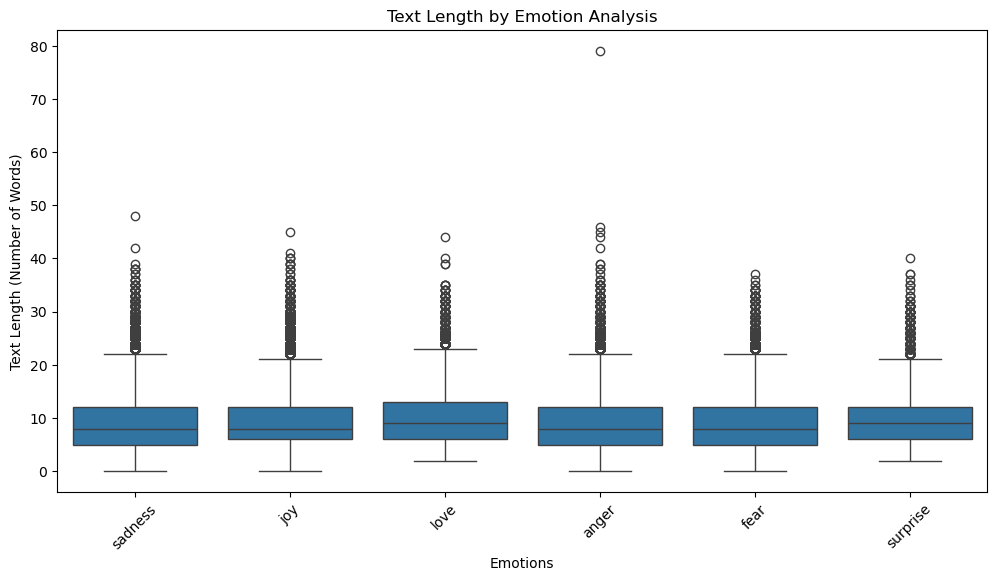

In [214]:
d['Text_Length'] = d['cleaned_text'].apply(lambda x: len(x.split()))

# plotting the distribution of text length per emotion
plt.figure(figsize=(12, 6))
sns.boxplot(data=d, x='emotions', y='Text_Length')
plt.title("Text Length by Emotion Analysis")
plt.xlabel("Emotions")
plt.ylabel("Text Length (Number of Words)")
plt.xticks(rotation=45)
plt.show()

#### Vocabulary Size and Common Words Analysis

In [216]:
# calculating the vocabulary size for each emotion
vocab_sizes = d.groupby('emotions')['cleaned_text'].apply(lambda x: len(set(' '.join(x).split())))
print("Vocabulary Size by Emotions:\n", vocab_sizes)

Vocabulary Size by Emotions:
 emotions
anger       28286
fear        24387
joy         47187
love        24263
sadness     38461
surprise    14496
Name: cleaned_text, dtype: int64


#### Top 10 Unique Word Pairs

/var/folders/8m/b138532d02d3s5z26hxk39j40000gn/T/ipykernel_22866/1579810183.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')


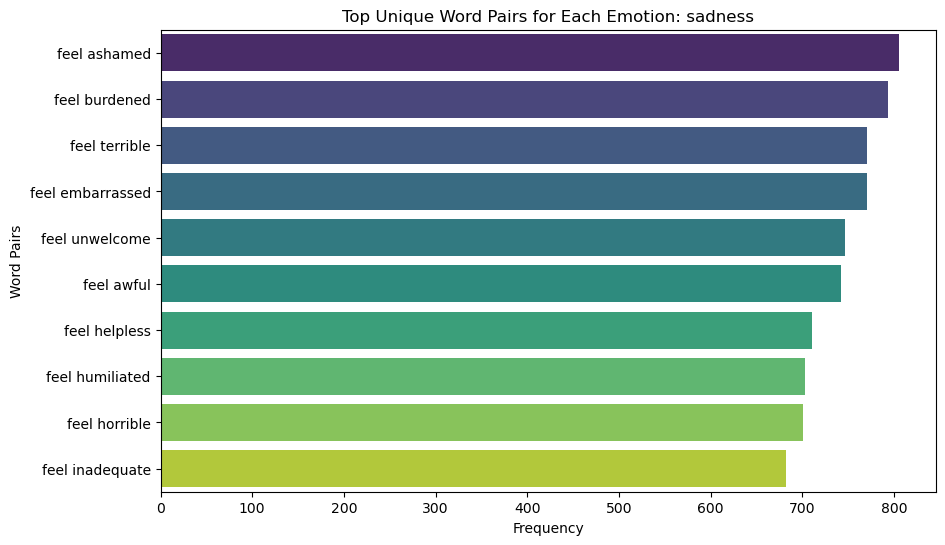

/var/folders/8m/b138532d02d3s5z26hxk39j40000gn/T/ipykernel_22866/1579810183.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')


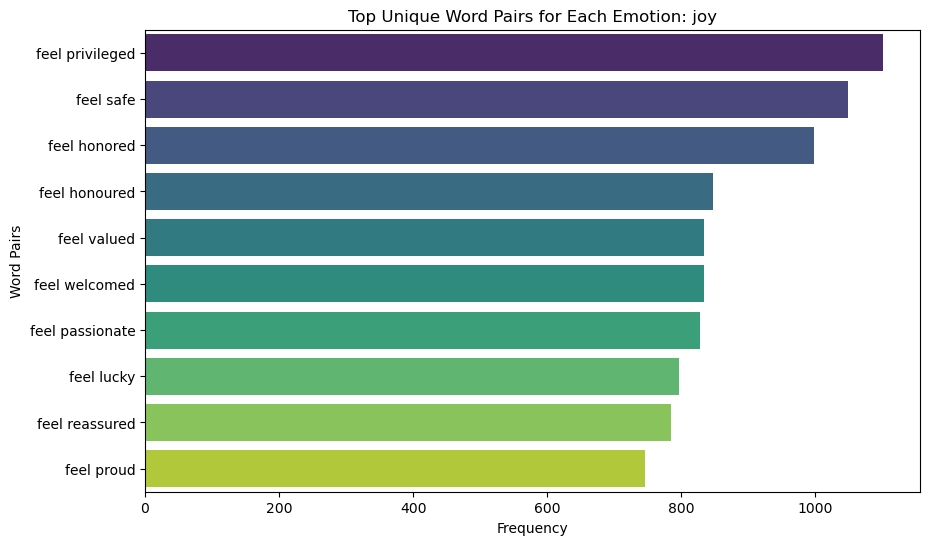

/var/folders/8m/b138532d02d3s5z26hxk39j40000gn/T/ipykernel_22866/1579810183.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')


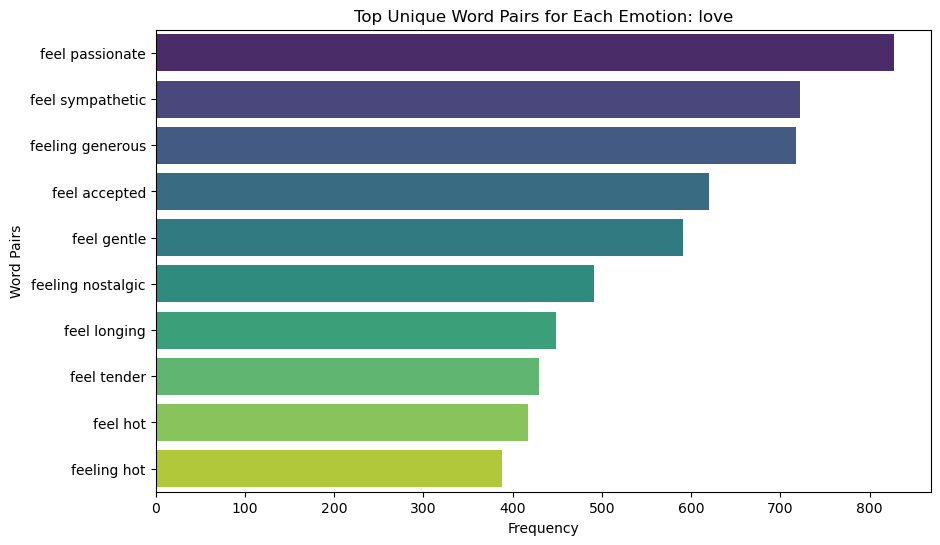

/var/folders/8m/b138532d02d3s5z26hxk39j40000gn/T/ipykernel_22866/1579810183.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')


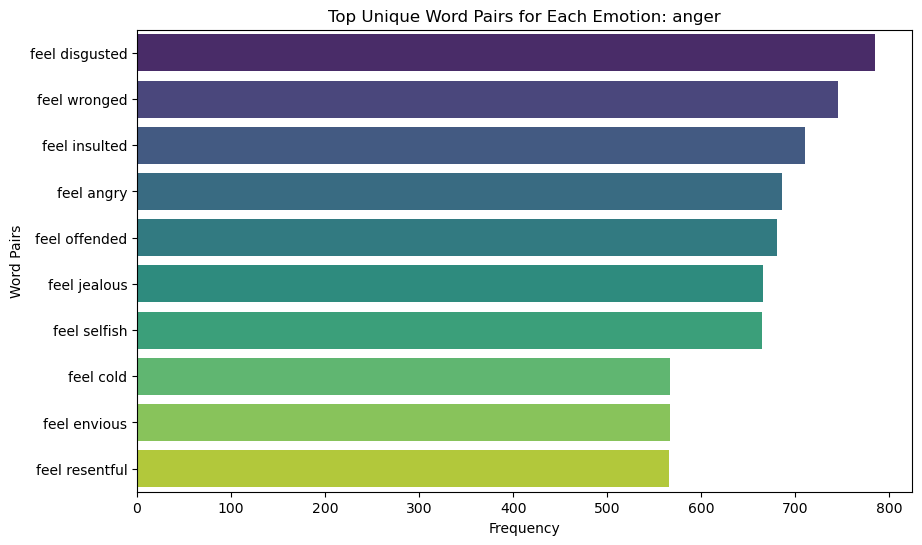

/var/folders/8m/b138532d02d3s5z26hxk39j40000gn/T/ipykernel_22866/1579810183.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')


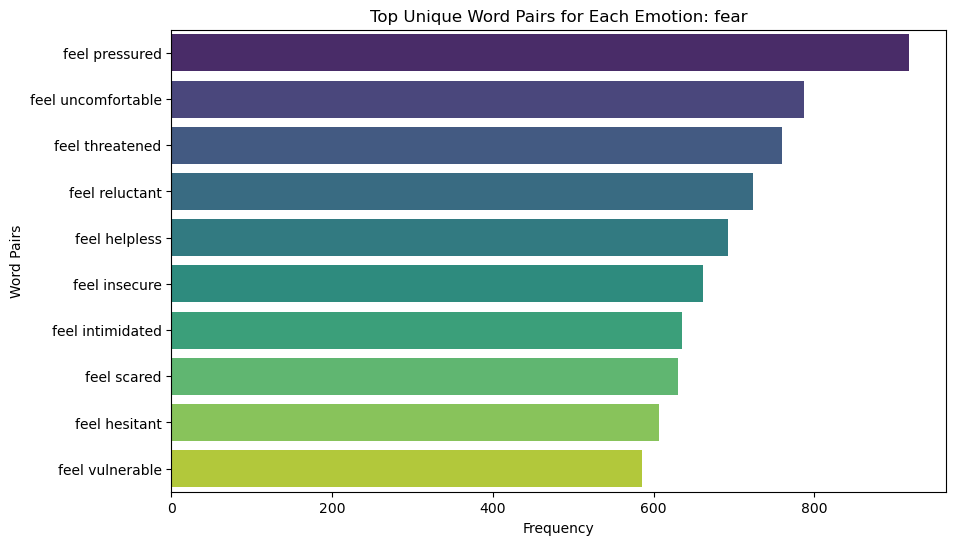

/var/folders/8m/b138532d02d3s5z26hxk39j40000gn/T/ipykernel_22866/1579810183.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')


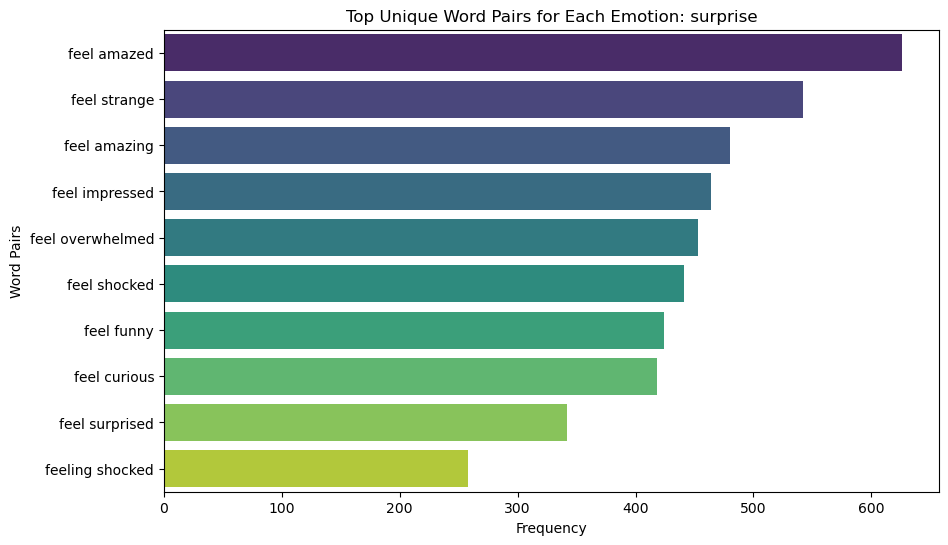

In [218]:
# extracting the word pairs for each emotion
emotion_bigrams = {}
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

for emotion in d['emotions'].unique():
    text_data = d[d['emotions'] == emotion]['cleaned_text']
    bigram_matrix = vectorizer.fit_transform(text_data)
    bigram_counts = dict(zip(vectorizer.get_feature_names_out(), bigram_matrix.sum(axis=0).A1))
    emotion_bigrams[emotion] = Counter(bigram_counts)

# Identifying the common word pairs across all the emotions and filtering them out
common_bigrams = set.intersection(*[set(bigrams.keys()) for bigrams in emotion_bigrams.values()])
unique_emotion_bigrams = {emotion: [bigram for bigram in bigrams if bigram not in common_bigrams]
                          for emotion, bigrams in emotion_bigrams.items()}

# displaying the top 10 unique word pairs for each emotion
for emotion, bigrams in unique_emotion_bigrams.items():
    top_bigrams = Counter({bigram: emotion_bigrams[emotion][bigram] for bigram in bigrams}).most_common(10)
    
    # creating a data frame
    bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])
    
    # plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')
    plt.title(f"Top Unique Word Pairs for Each Emotion: {emotion}")
    plt.xlabel("Frequency")
    plt.ylabel("Word Pairs")
    plt.show()

#### Comparing Sentiment Polarity for Each Emotion

/var/folders/8m/b138532d02d3s5z26hxk39j40000gn/T/ipykernel_22866/467937708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d, x='emotions', y='polarity', palette='coolwarm')


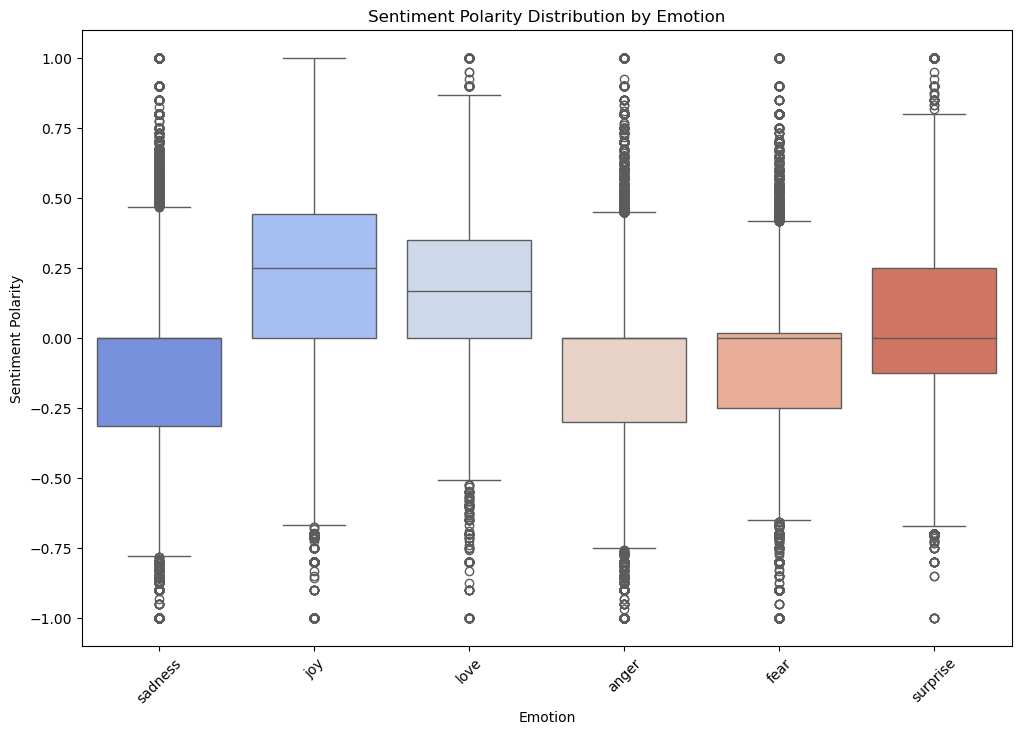

In [220]:
d['polarity'] = d['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(12, 8))
sns.boxplot(data=d, x='emotions', y='polarity', palette='coolwarm')
plt.title("Sentiment Polarity Distribution by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()